In [57]:
import matplotlib.pyplot as plt
import numpy as np
from src.options import Colors, Linestyles
from src.aux_function import *
import json

fontSize = 15 # 22 generates the font more like the latex text
save_fig = True

# ===================== Plot of graphs for results of the first gan gs experiment =====================

In [2]:
json_file = open('outputs/gan_experiments_output.json')

gan_experiments = json.load(json_file)
print(gan_experiments.keys())

dict_keys(['description', 'val_recursive_1hour_models_15epochs', 'val_epoch_loss', 'disc_epoch_loss', 'gen_epoch_loss', 'best_val_loss_and_epoch'])


In [3]:
# values for best_unet recursive and cmv on mae up to 1 hour
best_unet = [0.05803579, 0.07733818, 0.09227042, 0.10242441, 0.11052191, 0.11825367]
cmv = [0.06407604, 0.08347717, 0.09616664, 0.10551146, 0.11290251, 0.119154]

## PLOT NO1: recursive validation up to 1 hour on RMSE on models trained 15 epochs

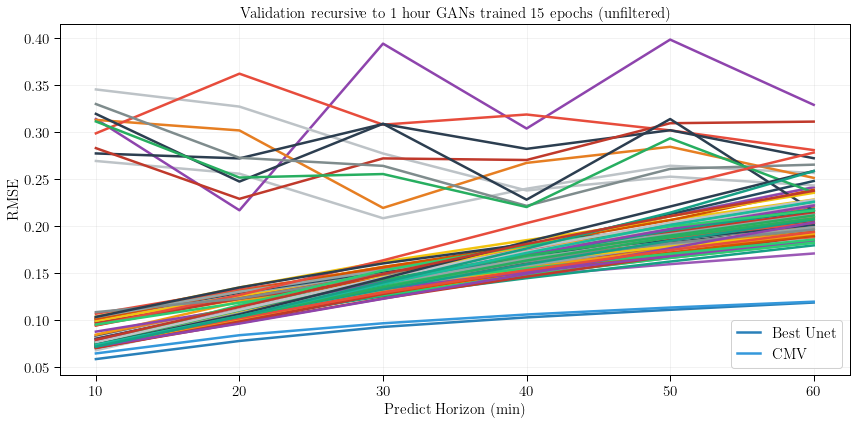

In [4]:
outputs = gan_experiments['val_recursive_1hour_models_15epochs']

# 1.1) Plot all values witout filtering
colors = [Colors.random_color(del_subpalettes=['blues']) for i in range(104)]

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GANs trained 15 epochs (unfiltered) ', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
i = 0
for k in outputs.keys():
    ax.plot(range(10, 70, 10), outputs[k], color=colors[i], linewidth=2.5)
    i +=1
    
ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

plt.tight_layout()

# Save figure as PDF
if save_fig:
    fig.savefig('./figures/gan_plot11_validation_recursive_1hr_models_trained_15epochs_unfiltered.pdf')
    
#
plt.show()

Outliers filtered: ['aaah8', 'aaai3', 'aaai4', 'aaal4', 'aaal8', 'aaam4', 'aaam6', 'aaam7', 'aaam8', 'aaam11']


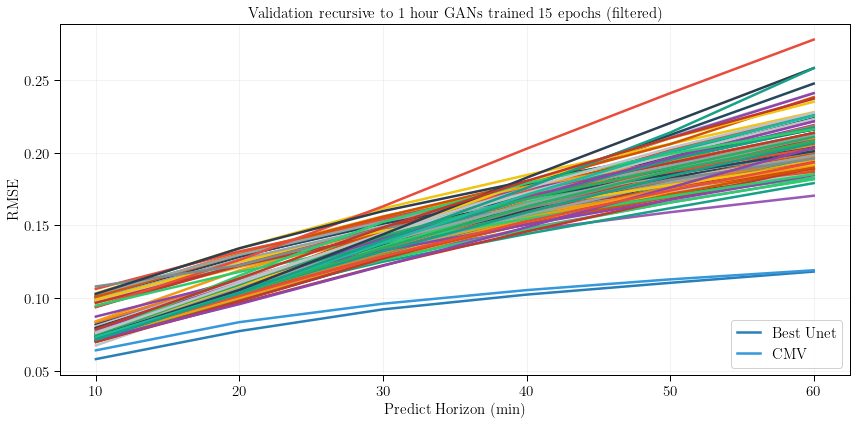

In [5]:
# 1.2) Plot all values filtering

outlier_exps = []
for k in outputs.keys():
    if outputs[k][0] > 0.25:
        outlier_exps.append(k)
print(f'Outliers filtered: {outlier_exps}')

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GANs trained 15 epochs (filtered) ', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
i = 0
for k in outputs.keys():
    if k not in outlier_exps:
        ax.plot(range(10, 70, 10), outputs[k], color=colors[i], linewidth=2.5)
    i += 1
ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot12_validation_recursive_1hr_models_trained_15epochs_filtered.pdf')
    
plt.tight_layout()
plt.show()

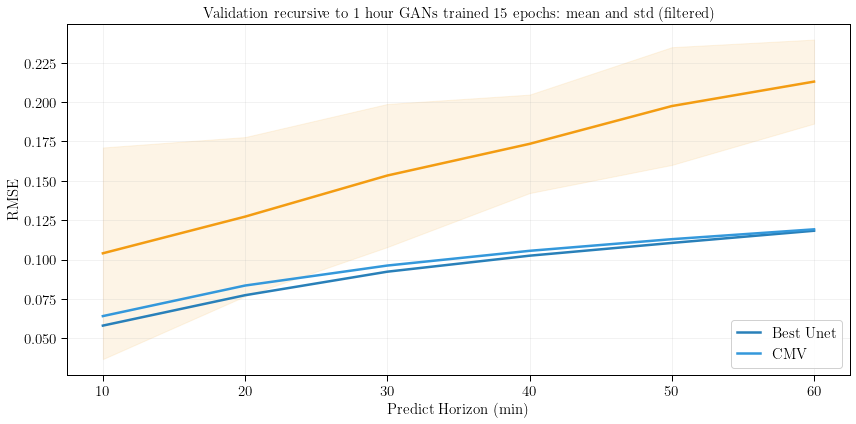

In [6]:
# 1.3) Plot mean and std for all models (filtered)

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GANs trained 15 epochs: mean and std (filtered)', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
stacked_outputs = []
for k in outputs.keys():
    if outputs[k] not in outlier_exps:
        stacked_outputs.append(outputs[k])

stacked_outputs = np.array(stacked_outputs)

mean = np.mean(stacked_outputs, axis=0)
std = np.std(stacked_outputs, axis=0)

ax.plot(range(10, 70, 10), mean, color=Colors.orange, linewidth=2.5)
plt.fill_between(range(10, 70, 10), mean - std, mean + std, color=Colors.orange, alpha=.1)

ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot13_validation_recursive_1hr_models_trained_15epochs_mean_std_filtered.pdf')
    
plt.tight_layout()
plt.show()

## PLOT NO2: validation loss on all models for every epoch

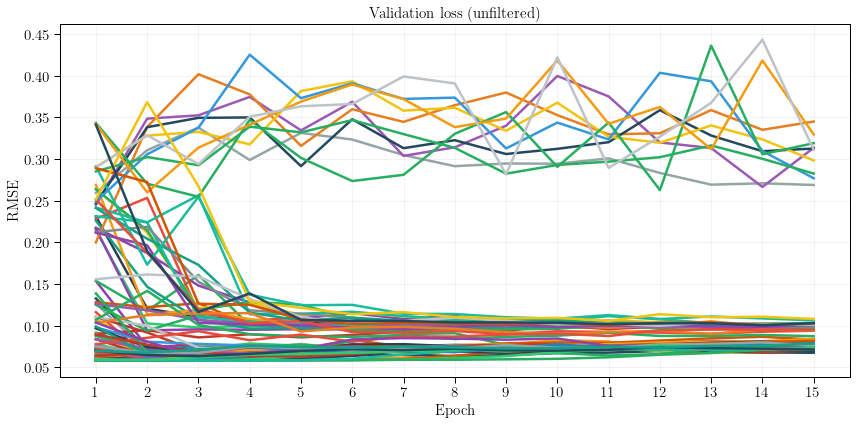

In [7]:
# 2.1) Val loss for every epoch unfiltered

outputs = gan_experiments['val_epoch_loss']

colors = [Colors.random_color() for i in range(104)]

show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation loss (unfiltered) ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
i = 0
for k in outputs.keys():
    ax.plot(x, outputs[k], color=colors[i], linewidth=2.5)
    i += 1
    
plt.xticks(x)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot21_validation_loss_for_each_epoch_unfiltered.pdf')
    
plt.tight_layout()
plt.show()


Filtered experiments: ['aaah8', 'aaai3', 'aaai4', 'aaal4', 'aaal8', 'aaam4', 'aaam6', 'aaam7', 'aaam8', 'aaam11']


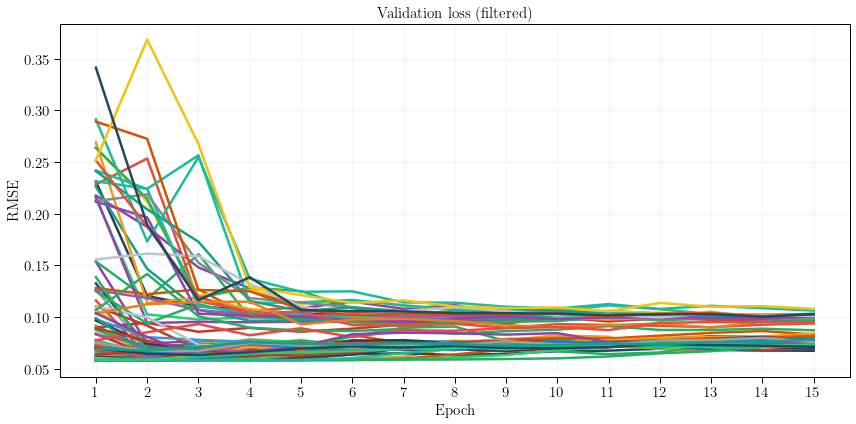

In [8]:
# 2.2) Val loss for every epoch filtered

outputs = gan_experiments['val_epoch_loss']

filtered_val_loss = []

for k in outputs.keys():
    if outputs[k][-1] > 0.2:
        filtered_val_loss.append(k)
print(f'Filtered experiments: {filtered_val_loss}')

show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation loss (filtered) ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
i = 0
for k in outputs.keys():
    if k not in filtered_val_loss:
        ax.plot(x, outputs[k], color=colors[i], linewidth=2.5)
    i += 1
    
# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

plt.xticks(x)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot22_validation_loss_for_each_epoch_filtered.pdf')
    
plt.tight_layout()
plt.show()


Filtered experiments: ['aaah8', 'aaai3', 'aaai4', 'aaal4', 'aaal8', 'aaam4', 'aaam6', 'aaam7', 'aaam8', 'aaam11']


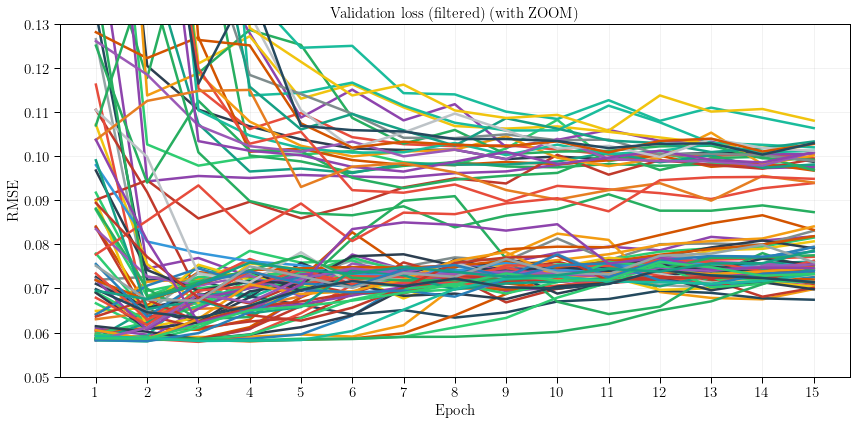

In [9]:
# 2.3) Val loss for every epoch filtered (with ZOOM)

outputs = gan_experiments['val_epoch_loss']

filtered_val_loss = []

for k in outputs.keys():
    if outputs[k][-1] > 0.2:
        filtered_val_loss.append(k)
print(f'Filtered experiments: {filtered_val_loss}')

show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation loss (filtered) (with ZOOM)', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)

ax.set_ylim(0.05, 0.13)

# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
i = 0
for k in outputs.keys():
    if k not in filtered_val_loss:
        ax.plot(x, outputs[k], color=colors[i], linewidth=2.5)
    i += 1
    
plt.xticks(x)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot23_validation_loss_for_each_epoch_filtered_zoom.pdf')
    
plt.tight_layout()
plt.show()

['aaaj5', 'aaaj6', 'aaaj9', 'aaaj10', 'aaaj13', 'aaan5', 'aaan6', 'aaan9', 'aaan10', 'aaan13']


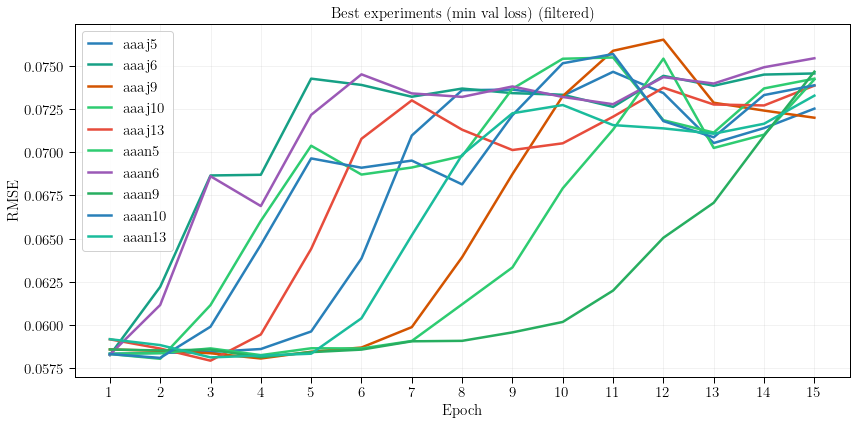

In [10]:
# 2.4) Val loss for every epoch filtered: only the 10 best experiments

outputs = gan_experiments['val_epoch_loss']

best_10_exp = get_best_n_exp(exp_dict=outputs, n=10)
print(best_10_exp)

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Best experiments (min val loss) (filtered) ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
i = 0
for k in outputs.keys():
    if k in best_10_exp:
        ax.plot(x, outputs[k], color=colors[i], 
                label=k, linewidth=2.5)
    i += 1

plt.xticks(x)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=0, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot24_validation_loss_for_each_epoch_filtered_best_exps.pdf')
    
plt.tight_layout()
plt.show()


## PLOT NO3: Disc loss on all models for every epoch

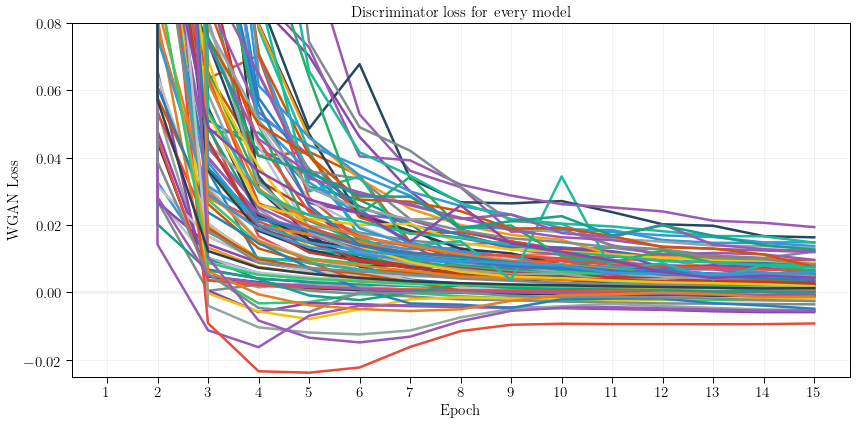

In [11]:
# 3.1) Disc loss for every epoch unfiltered

outputs = gan_experiments['disc_epoch_loss']

colors = [Colors.random_color() for i in range(104)]

show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Discriminator loss for every model', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'WGAN Loss', fontsize=fontSize)


# Tick size and grid
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
ax.axhline(y=0, color=Colors.clouds, linewidth=2.5, xmax=0.8)
i = 0
for k in outputs.keys():
    ax.plot(x, outputs[k], color=colors[i], linewidth=2.5)
    i += 1

plt.xticks(x)
plt.ylim(-0.025, 0.08)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot31_disc_loss_for_every_model.pdf')
    
plt.tight_layout()
plt.show()


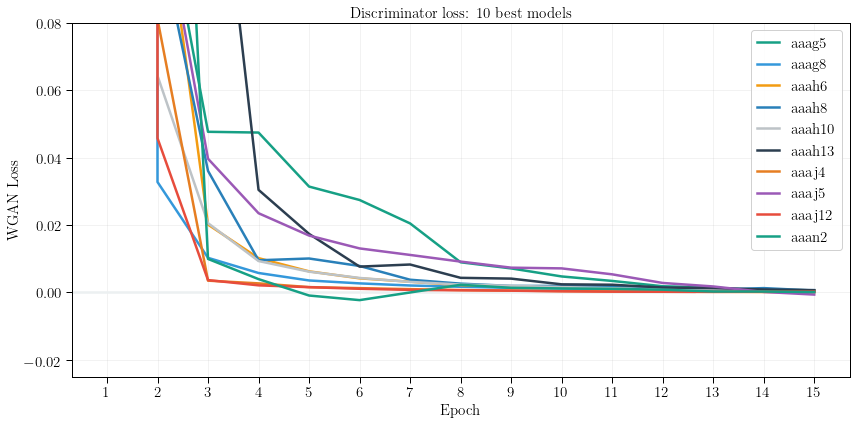

In [12]:
# 3.2) Disc loss for every epoch: 10 best models


outputs = gan_experiments['disc_epoch_loss']

# get best 10 models
n = 10
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])
# ahora tengo en end_vals los valores finales, ahora quiero los indices de los 10 menores valores
best_models_idxs = end_vals.argsort()[:n]

best_models = []
for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        best_models.append(k)

# Plotting:
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Discriminator loss: 10 best models', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'WGAN Loss', fontsize=fontSize)


# Tick size and grid
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
ax.axhline(y=0, color=Colors.clouds, linewidth=2.5, xmax=0.8)

i = 0
for k in outputs.keys():
    if k in best_models:
        ax.plot(x, outputs[k], color=colors[i],
                linewidth=2.5, label=k)
    i += 1


plt.xticks(x)
plt.ylim(-0.025, 0.08)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot32_disc_loss_10_best_model.pdf')
    
plt.tight_layout()
plt.show()

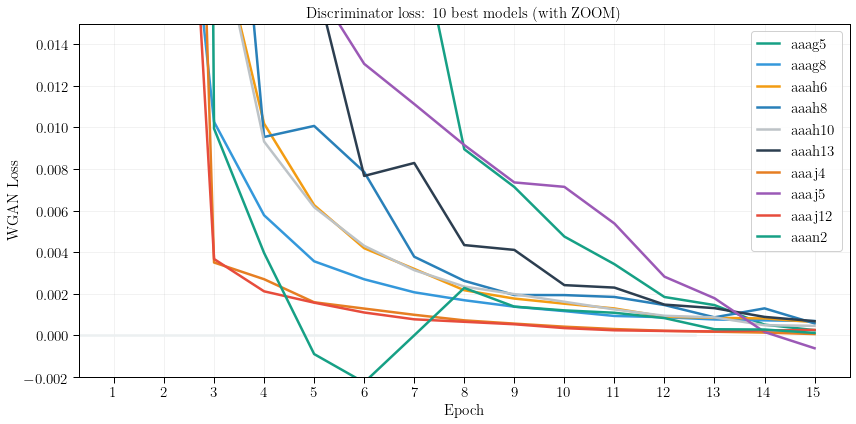

In [13]:
# 3.3) Disc loss for every epoch: 10 best models with ZOOM


outputs = gan_experiments['disc_epoch_loss']

# get best 10 models
n = 10
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])
# ahora tengo en end_vals los valores finales, ahora quiero los indices de los 10 menores valores
best_models_idxs = end_vals.argsort()[:n]

best_models = []
for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        best_models.append(k)

# Plotting:
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Discriminator loss: 10 best models (with ZOOM)', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'WGAN Loss', fontsize=fontSize)


# Tick size and grid
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
ax.axhline(y=0, color=Colors.clouds, linewidth=2.5, xmax=0.8)
i = 0
for k in outputs.keys():
    if k in best_models:
        ax.plot(x, outputs[k], color=colors[i],
                linewidth=2.5, label=k)
    i += 1


plt.xticks(x)
plt.ylim(-0.002, 0.015)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot33_disc_loss_10_best_model_zoom.pdf')
    
plt.tight_layout()
plt.show()

## PLOT NO4: Gen loss on all models for every epoch

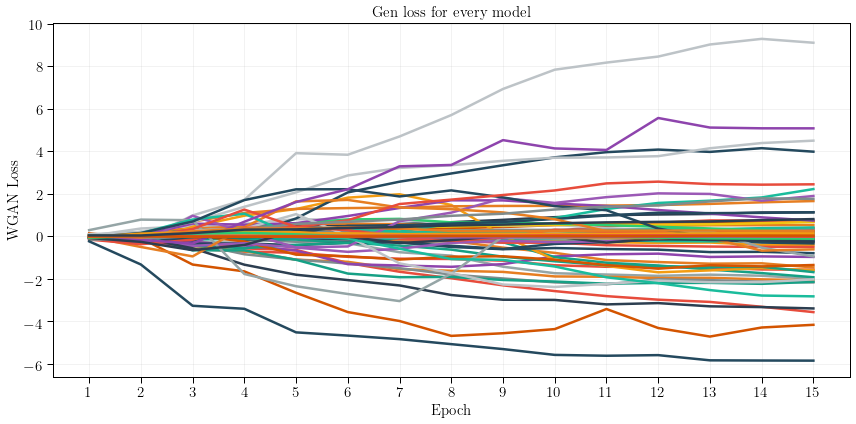

In [14]:
# 4.1) Gen loss for every epoch unfiltered

outputs = gan_experiments['gen_epoch_loss']

show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Gen loss for every model', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'WGAN Loss', fontsize=fontSize)


# Tick size and grid
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
for k in outputs.keys():
    ax.plot(x, outputs[k], color=Colors.random_color(del_subpalettes=['blues']), linewidth=2.5)


plt.xticks(x)
#plt.ylim(-0.025, 0.08)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot41_gen_loss_every_model.pdf')
    
plt.tight_layout()
plt.show()


## PLOT NO5: Validation recursive for all models and best epoch

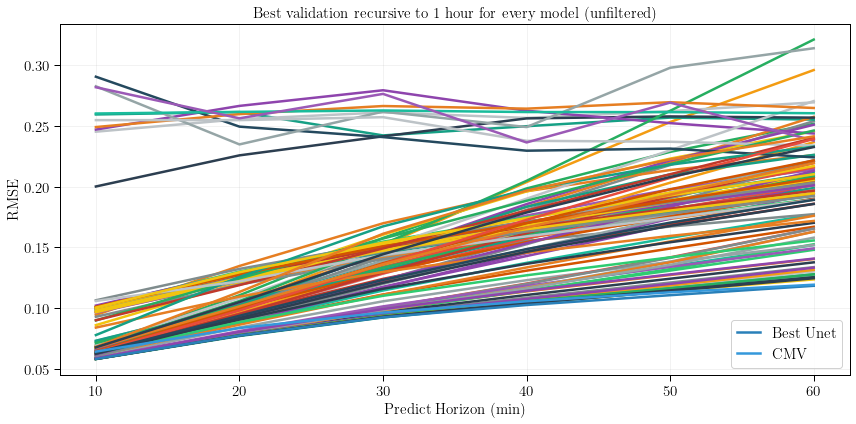

In [15]:
# 5.1) Plot all values witout filtering

outputs = gan_experiments['best_val_loss_and_epoch']

colors = [Colors.random_color(del_subpalettes=['blues']) for i in range(104)]

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Best validation recursive to 1 hour for every model (unfiltered) ', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
i = 0
for k in outputs.keys():
    ax.plot(range(10, 70, 10), outputs[k]['val_rec_1hr'], color=colors[i], linewidth=2.5)
    i += 1
    
ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot51_best_val_recursive_1hr_every_model_unfiltered.pdf')
    
plt.tight_layout()
plt.show()

Outliers filtered: ['aaah8', 'aaai3', 'aaai4', 'aaal4', 'aaal8', 'aaam4', 'aaam6', 'aaam7', 'aaam8', 'aaam11']


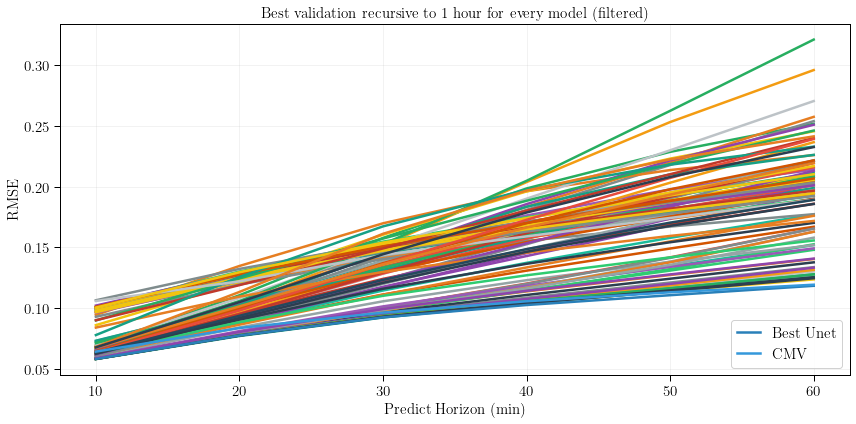

In [16]:
# 5.2) Plot all values with filtering

outputs = gan_experiments['best_val_loss_and_epoch']

outlier_exps = []
for k in outputs.keys():
    if outputs[k]['val_rec_1hr'][0] > 0.15:
        outlier_exps.append(k)
print(f'Outliers filtered: {outlier_exps}')

show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Best validation recursive to 1 hour for every model (filtered) ', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
i = 0
for k in outputs.keys():
    if k not in outlier_exps:
        ax.plot(range(10, 70, 10), outputs[k]['val_rec_1hr'], color=colors[i], linewidth=2.5)
    i += 1
    
ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot52_best_val_recursive_1hr_every_model_filtered.pdf')
    
plt.tight_layout()
plt.show()

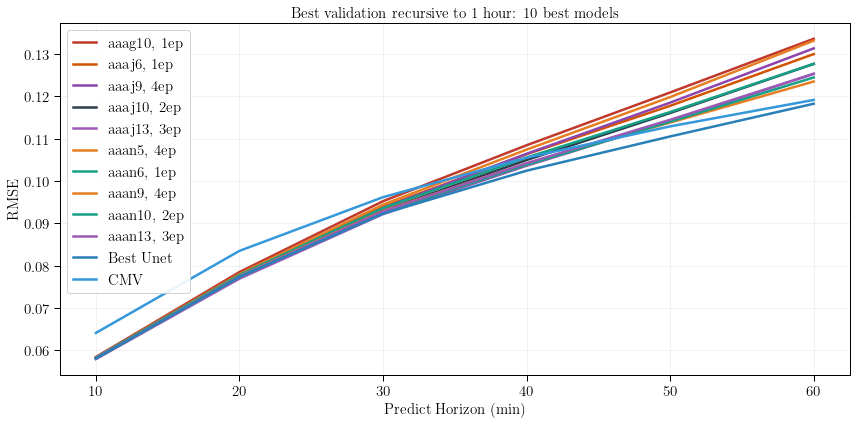

In [17]:
# 5.3) Plot 10 best models

outputs = gan_experiments['best_val_loss_and_epoch']


# get best 10 models
n = 10
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k]['val_rec_1hr'])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])

# ahora tengo en end_vals los valores finales, ahora quiero los indices de los 10 menores valores
best_models_idxs = end_vals.argsort()[:n]

best_models = []
for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        best_models.append(k)

colors = [Colors.random_color(del_subpalettes=['blues']) for i in range(104)]

# Plotting
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Best validation recursive to 1 hour: 10 best models', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
i = 0
for k in outputs.keys():
    if k in best_models:
        epoch = outputs[k]['epoch']
        ax.plot(range(10, 70, 10), outputs[k]['val_rec_1hr'], 
                color=colors[i],
                linewidth=2.5, label=f'{k}, {epoch}ep')
    i += 1
        
ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=0, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot53_best_val_recursive_1hr_10_best_models.pdf')
    
plt.tight_layout()
plt.show()

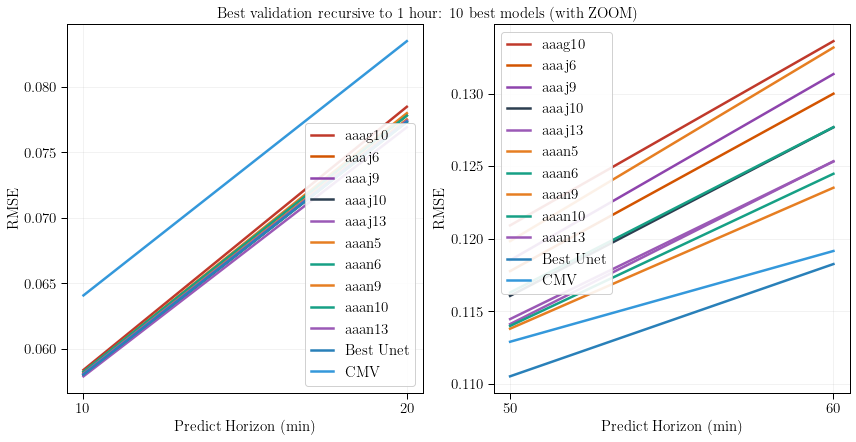

In [18]:
# 5.4) Plot 10 best models: Zooms

outputs = gan_experiments['best_val_loss_and_epoch']

# get best 10 models
n = 10
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k]['val_rec_1hr'])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])

# ahora tengo en end_vals los valores finales, ahora quiero los indices de los 10 menores valores
best_models_idxs = end_vals.argsort()[:n]

best_models = []
for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        best_models.append(k)

# Plotting
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.suptitle(r'Best validation recursive to 1 hour: 10 best models (with ZOOM)', 
             fontsize=fontSize, y=1.015)
fig.set_size_inches(12, 6)

# FIRST SUBPLOT =============================================================
ax = fig.add_subplot(1, 2, 1)

# Labels and Title
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')


# Plotting 
plot_to = 2
x = range(10, (plot_to+1)*10, 10)
plt.xticks(x)

i = 0
for k in outputs.keys():
    if k in best_models:
        epoch = outputs[k]['epoch']
        ax.plot(x, outputs[k]['val_rec_1hr'][:plot_to], 
                color=colors[i],
                linewidth=2.5, label=f'{k}')
    i += 1
        
ax.plot(x, best_unet[:plot_to], color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(x, cmv[:plot_to], color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# SECOND SUBPLOT =============================================================
ax = fig.add_subplot(1, 2, 2)

# Labels and Title
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
plot_from = 5
x = range(plot_from*10, 70, 10)
plt.xticks(x)

i = 0
for k in outputs.keys():
    if k in best_models:
        epoch = outputs[k]['epoch']
        ax.plot(x, outputs[k]['val_rec_1hr'][(plot_from-1):], 
                color=colors[i],
                linewidth=2.5, label=f'{k}')
    i += 1
        
ax.plot(x, best_unet[(plot_from-1):], color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(x, cmv[(plot_from-1):], color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=2, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)


plt.tight_layout()

# Save figure as PDF
if save_fig:
    fig.savefig('./figures/gan_plot54_best_val_recursive_1hr_10_best_models_zoom.pdf', bbox_inches='tight')
    
plt.show()

## PLOT NO6: Best models according to: wgan_disc_loss, val_rec_15_epochs, val_rec_best

aaag8
aaan9


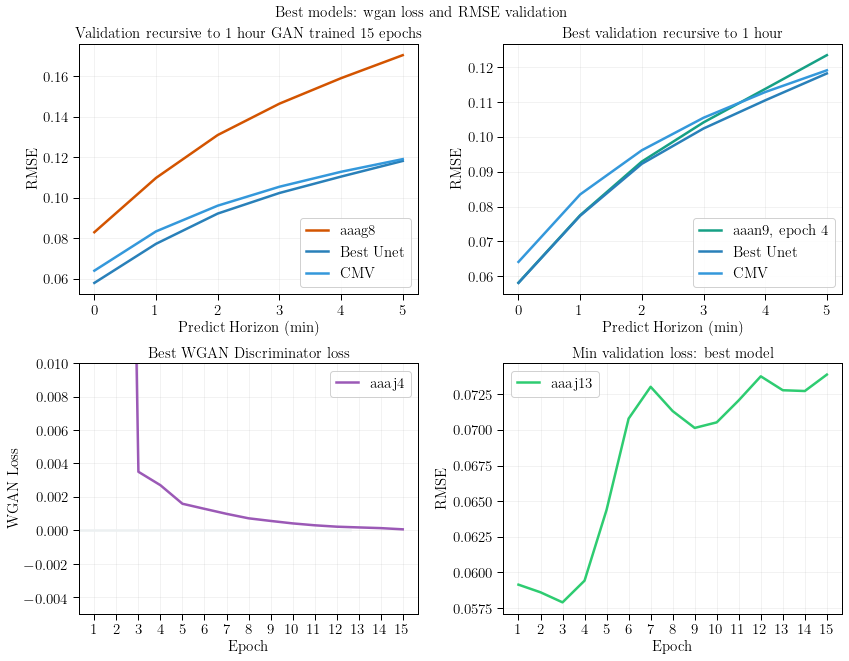

In [58]:
# 6.1) Plot best models



# outputs = gan_experiments['best_val_loss_and_epoch']

# # get best 10 models
# n = 10
# stacked = []
# for k in outputs.keys():
#     stacked.append(outputs[k]['val_rec_1hr'])
# stacked = np.array(stacked)

# end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
#                           (-1)*np.ones_like(stacked.shape[1])])

# # ahora tengo en end_vals los valores finales, ahora quiero los indices de los 10 menores valores
# best_models_idxs = end_vals.argsort()[:n]

# best_models = []
# for idx, k in enumerate(outputs.keys()):
#     if idx in best_models_idxs:
#         best_models.append(k)

# Plotting
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.suptitle(r'Best models: wgan loss and RMSE validation', 
             fontsize=fontSize, y=1.015)
fig.set_size_inches(12, 9)

# FIRST SUBPLOT =============================================================
ax = fig.add_subplot(2, 2, 1)

outputs = gan_experiments['val_recursive_1hour_models_15epochs']

# ===
n = 1
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])

best_models_idxs = end_vals.argsort()[:n]

for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        print(k)
        best_model = k
# ===

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GAN trained 15 epochs', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)

# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')


# Plotting 
ax.plot(outputs[best_model], color=Colors.random_color(del_subpalettes='blues'), 
        linewidth=2.5, label=f'{best_model}')
        
ax.plot(best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# SECOND SUBPLOT =============================================================

ax = fig.add_subplot(2, 2, 2)

outputs = gan_experiments['best_val_loss_and_epoch']

# ===
n = 1
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k]['val_rec_1hr'])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])

best_models_idxs = end_vals.argsort()[:n]

for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        print(k)
        best_model = k
# ===

# Labels and Title
ax.set_title(r'Best validation recursive to 1 hour', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)

# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')


# Plotting 
epoch = outputs[best_model]['epoch']
ax.plot(outputs[best_model]['val_rec_1hr'], color=Colors.random_color(del_subpalettes='blues'), 
        linewidth=2.5, label=f'{best_model}, epoch {epoch}')
        
ax.plot(best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# THIRD SUBPLOT ===============================================================

ax = fig.add_subplot(2, 2, 3)

outputs = gan_experiments['disc_epoch_loss']

# get best model
n = 1
stacked = []
for k in outputs.keys():
    stacked.append(outputs[k])
stacked = np.array(stacked)

end_vals = np.abs(stacked[np.arange(stacked.shape[0]), 
                          (-1)*np.ones_like(stacked.shape[1])])

best_models_idxs = end_vals.argsort()[:n]

for idx, k in enumerate(outputs.keys()):
    if idx in best_models_idxs:
        best_model = k

# Labels and Title
ax.set_title(r'Best WGAN Discriminator loss ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'WGAN Loss', fontsize=fontSize)

# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
ax.axhline(y=0, color=Colors.clouds, linewidth=2.5, xmax=0.8)

ax.plot(x, outputs[best_model], color=Colors.random_color(del_subpalettes='blues'),
        linewidth=2.5, label=best_model)

plt.xticks(x)
plt.ylim(-0.005, 0.01)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# FORTH SUBPLOT ===============================================================

ax = fig.add_subplot(2, 2, 4)

outputs = gan_experiments['val_epoch_loss']

best_model = get_best_n_exp(exp_dict=outputs, n=1)[0]


# Labels and Title
ax.set_title(r'Min validation loss: best model ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)

# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)

ax.plot(x, outputs[best_model], color=Colors.random_color(del_subpalettes='blues'), 
                label=best_model, linewidth=2.5)

plt.xticks(x)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=0, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

plt.tight_layout()

# Save figure as PDF
if save_fig:
    fig.savefig('./figures/gan_plot61_best_models.pdf', bbox_inches='tight')
    
plt.show()

RMSE loss for model aaan9:
	 epoch15: [0.07469577, 0.11550294, 0.15245554, 0.17913513, 0.19931526, 0.21616931]
	 epoch4:  [0.05810275, 0.07749751, 0.09292419, 0.10418135, 0.1138006, 0.12351038]


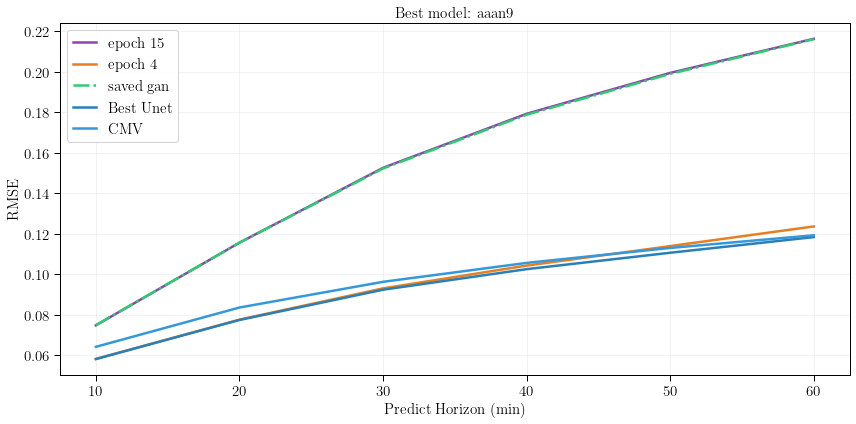

In [64]:
# Voy a verificar si guarde los modelos en la mejor val loss o no
# En teoria el mejor modelo es el "aaan9" en la epoca 4
# voy a plotear este modelo en la epoca 4 y la epoca 15 y despues levantar
# el modelo en el cluster y ver cual de las dos guardo

outputs = gan_experiments['val_recursive_1hour_models_15epochs']
aaan9_ep15 = outputs['aaan9']

outputs = gan_experiments['best_val_loss_and_epoch']
aaan9_ep4 = outputs['aaan9']['val_rec_1hr']

print(f'RMSE loss for model aaan9:')
print(f'\t epoch15: {aaan9_ep15}')
print(f'\t epoch4:  {aaan9_ep4}')

# Plotting
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Best model: aaan9', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'RMSE', fontsize=fontSize)

# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting
x = range(10, 70, 10) 

ax.plot(x, aaan9_ep15, color=Colors.wisteria,
                linewidth=2.5, label=f'epoch 15')
ax.plot(x, aaan9_ep4, color=Colors.carrot,
                linewidth=2.5, label=f'epoch {epoch}')
    
    
saved_gan = [0.07478834, 0.11548448, 0.15211733, 0.1786568,  0.19881453, 0.21599801]    

ax.plot(x, saved_gan, color=Colors.emerald,
                linewidth=2.5, linestyle=Linestyles.dashdot, label=f'saved gan')
ax.plot(x, best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(x, cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')


# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=0, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
save_fig = True
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/kaka.png')
    
plt.tight_layout()
plt.show()